# CODE_1

## Target:
* to figure out a way to get RF right 
## Results:
* Model Parameters : 194,884
* Best Training accuracy : 98.92
* Best Testing accuracy : 98.64
## Analysis:
* Model is overfitting. 
* after a certain epochs test accuracy saturated but train accuracy kept going up

CUDA Available? True


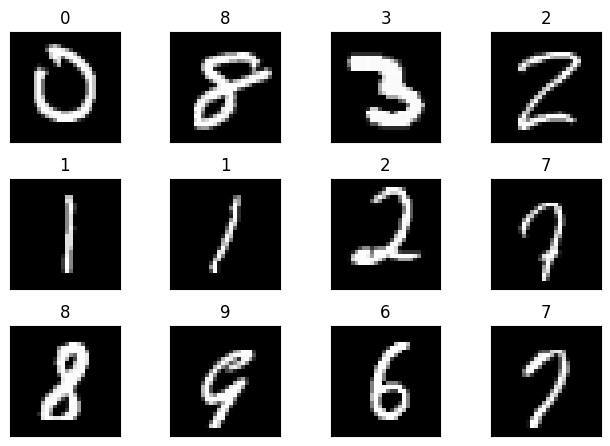

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
import os
# os['KMP_DUPLICATE_LIB_OK']='True'
# CUDA?
cuda = torch.cuda.is_available()

# device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print("CUDA Available?", cuda)
# Train data transformations

train_transforms = transforms.Compose([
    # transforms.RandomApply([transforms.CenterCrop(22), ], p=0.1),
    # transforms.Resize((28, 28)),
    # transforms.RandomRotation((-15., 15.), fill=0),
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,)),
    ])

# Test data transformations
test_transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
    ])
train_data = datasets.MNIST('../data', train=True, download=True, transform=train_transforms)
test_data = datasets.MNIST('../data', train=False, download=True, transform=test_transforms)
batch_size = 512

kwargs = {'batch_size': batch_size, 'shuffle': True, 'num_workers': 2, 'pin_memory': True}

test_loader = torch.utils.data.DataLoader(test_data, **kwargs)
train_loader = torch.utils.data.DataLoader(train_data, **kwargs)
from utils import return_dataset_images

return_dataset_images(train_loader, 12)

In [2]:
!pip install torchsummary
from model import Net, train, test, model_summary

use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")

model = Net().to(device)
model_summary(model, (1,28,28))

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 26, 26]             288
              ReLU-2           [-1, 32, 26, 26]               0
            Conv2d-3           [-1, 64, 24, 24]          18,432
              ReLU-4           [-1, 64, 24, 24]               0
            Conv2d-5          [-1, 128, 22, 22]          73,728
              ReLU-6          [-1, 128, 22, 22]               0
            Conv2d-7           [-1, 32, 22, 22]           4,096
         MaxPool2d-8           [-1, 32, 11, 11]               0
            Conv2d-9             [-1, 64, 9, 9]          18,432
             ReLU-10             [-1, 64, 9, 9]               0
           Conv2d-11            [-1, 128, 7, 7]          73,728
             ReLU-12            [-1, 128, 7, 7]               0
    

In [3]:

optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
# scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=15, gamma=0.1, verbose=True)
# New Line
criterion = nn.CrossEntropyLoss()
num_epochs = 15

for epoch in range(1, num_epochs+1):
  # print(f'Epoch {epoch}')
  train(model, device, train_loader, optimizer, criterion)
  test(model, device, test_loader)
  # scheduler.step()

Loss=0.7073907852172852 Batch_id=117 Accuracy=35.78: 100%|██████████| 118/118 [00:23<00:00,  5.11it/s]



Test set: Average loss: 0.5483, Accuracy: 8464/10000 (84.64%)



Loss=0.10974093526601791 Batch_id=117 Accuracy=90.76: 100%|██████████| 118/118 [00:18<00:00,  6.40it/s]



Test set: Average loss: 0.1610, Accuracy: 9510/10000 (95.10%)



Loss=0.0579998753964901 Batch_id=117 Accuracy=95.83: 100%|██████████| 118/118 [00:16<00:00,  7.09it/s]



Test set: Average loss: 0.0992, Accuracy: 9682/10000 (96.82%)



Loss=0.21111242473125458 Batch_id=117 Accuracy=97.07: 100%|██████████| 118/118 [00:17<00:00,  6.87it/s]



Test set: Average loss: 0.0801, Accuracy: 9742/10000 (97.42%)



Loss=0.10895460844039917 Batch_id=117 Accuracy=97.50: 100%|██████████| 118/118 [00:17<00:00,  6.79it/s]



Test set: Average loss: 0.0607, Accuracy: 9802/10000 (98.02%)



Loss=0.06964071840047836 Batch_id=117 Accuracy=97.90: 100%|██████████| 118/118 [00:16<00:00,  7.00it/s]



Test set: Average loss: 0.0553, Accuracy: 9819/10000 (98.19%)



Loss=0.04858270287513733 Batch_id=117 Accuracy=98.18: 100%|██████████| 118/118 [00:16<00:00,  7.25it/s]



Test set: Average loss: 0.0509, Accuracy: 9833/10000 (98.33%)



Loss=0.06206212565302849 Batch_id=117 Accuracy=98.34: 100%|██████████| 118/118 [00:17<00:00,  6.79it/s]



Test set: Average loss: 0.0535, Accuracy: 9824/10000 (98.24%)



Loss=0.0420505553483963 Batch_id=117 Accuracy=98.47: 100%|██████████| 118/118 [00:16<00:00,  7.37it/s]



Test set: Average loss: 0.0433, Accuracy: 9861/10000 (98.61%)



Loss=0.026517817750573158 Batch_id=117 Accuracy=98.60: 100%|██████████| 118/118 [00:17<00:00,  6.82it/s]



Test set: Average loss: 0.0482, Accuracy: 9846/10000 (98.46%)



Loss=0.025253674015402794 Batch_id=117 Accuracy=98.71: 100%|██████████| 118/118 [00:16<00:00,  7.22it/s]



Test set: Average loss: 0.0421, Accuracy: 9866/10000 (98.66%)



Loss=0.01641259901225567 Batch_id=117 Accuracy=98.74: 100%|██████████| 118/118 [00:16<00:00,  7.33it/s]



Test set: Average loss: 0.0460, Accuracy: 9848/10000 (98.48%)



Loss=0.038352590054273605 Batch_id=117 Accuracy=98.88: 100%|██████████| 118/118 [00:16<00:00,  7.25it/s]



Test set: Average loss: 0.0421, Accuracy: 9866/10000 (98.66%)



Loss=0.024840623140335083 Batch_id=117 Accuracy=98.98: 100%|██████████| 118/118 [00:16<00:00,  7.18it/s]



Test set: Average loss: 0.0388, Accuracy: 9868/10000 (98.68%)



Loss=0.1845133900642395 Batch_id=117 Accuracy=98.92: 100%|██████████| 118/118 [00:15<00:00,  7.39it/s]



Test set: Average loss: 0.0431, Accuracy: 9856/10000 (98.56%)

